## <center> Tuning Cosmic Explorer PSD using its Signals Recycling Cavity </center>
Instead of Using my previous calculations for the quantum noise, I will now use gwinc to get PSD for different Tunings.
At the end is an interactive plot that can shows PSDs for different Signal Recycling Cavity's (SRC) lengths (Ls) and mirror transmisivity (Ts)

In [1]:
import numpy as np
from numpy import log10, pi
import pandas as pd
import h5py
import matplotlib.pyplot as plt

import gwinc
from gwinc.struct import Struct

PSD for CE from gwinc

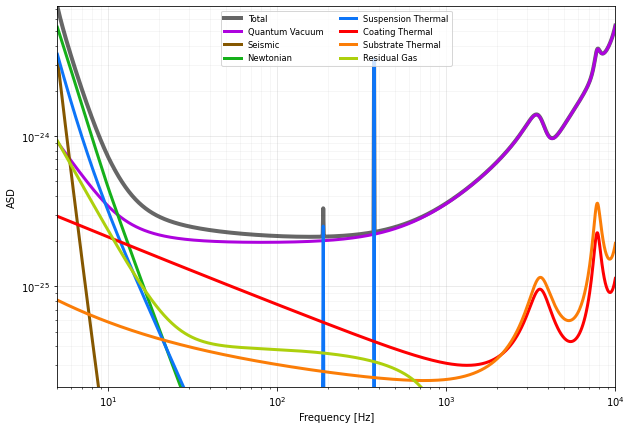

In [2]:
freq = np.logspace(log10(5), 4, 1000)
budget = gwinc.load_budget('CE2silica')
Trace = budget.run(freq=freq)

fig = gwinc.plot_trace(Trace)
fig.set_figheight(7)
fig.set_figwidth(10)
plt.ylabel('ASD')
plt.show()

Trying to change Ts and Ls

Text(0.5, 1.0, 'PSD for Cosmic Explorer with Different SRC Tunings')

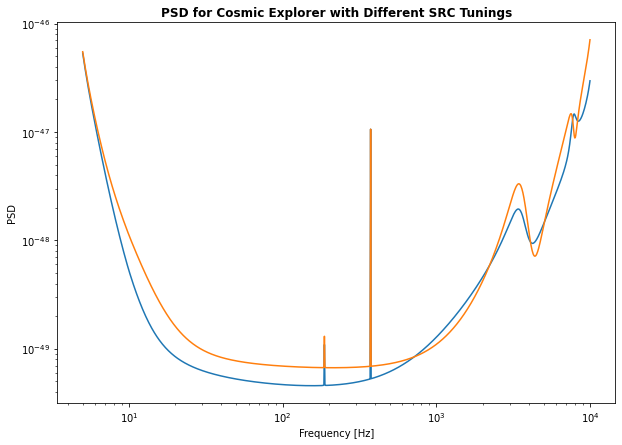

In [62]:
freq = np.logspace(log10(5), 4, 1000)

plt.figure(figsize=(10, 7))
ifo = Struct.from_file('ifo_tunning.yaml')

trace1 = budget.run(ifo=ifo, freq=freq)

ifo['Optics']['SRM']['Transmittance'] = 0.0125 #Ts
ifo['Optics']['SRM']['CavityLength'] = 40 #Ls
trace2 = budget.run(ifo=ifo, freq=freq)
    
plt.loglog(freq, trace1.psd)
plt.loglog(freq, trace2.psd)

plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.title('PSD for Cosmic Explorer with Different SRC Tunings', fontweight='bold')

### Interactive plot 

In [3]:
ifo = Struct.from_file('ifo_tunning.yaml')
def tuning(Ls, Ts):
    
    ifo['Optics']['SRM']['Transmittance'] = Ts
    ifo['Optics']['SRM']['CavityLength'] = Ls
    trace = budget.run(ifo=ifo, freq=freq)
    
    plt.figure(figsize = (10,7))
    plt.loglog(freq, Trace.psd, c='gray', lw=3, alpha=0.4)
    plt.loglog(freq, trace.psd, c='b')
    plt.ylim(min(Trace.psd)*0.9, max(Trace.psd)*1.1)
    
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('PSD')
    plt.title('PSD Tuning for Cosmic Explorer', fontweight='bold')

Slide for Ls. Type any value of Ts between 0-1.

In [11]:
from ipywidgets import interactive, widgets

Ls =  widgets.IntSlider(value=20, min=10, max=100, step=10, description='Ls [m]')
Ts=widgets.FloatText(value=0.02, min = 1/10000000, max=0.999, step = 0.01, description='Ts',disabled=False)

interactive(tuning, Ls= Ls, Ts=Ts)

interactive(children=(IntSlider(value=20, description='Ls [m]', min=10, step=10), FloatText(value=0.02, descri…